In [149]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('final_data_2.csv', index_col=0)
y = pd.read_csv('ordered_data_Y.csv')

In [7]:
X

,04-30-avg,04-30-min,04-30-max,05-01-avg,05-01-min,05-01-max,05-02-avg,05-02-min,05-02-max,05-03-avg,...,08-22-max,08-23-avg,08-23-min,08-23-max,08-24-avg,08-24-min,08-24-max,08-25-avg,08-25-min,08-25-max
2020-McLeod County,12.45,4.05,19.5,12.45,4.05,19.5,12.45,4.05,19.5,17.8,...,33.30,25.30,16.90,33.30,25.30,16.90,33.30,29.70,24.35,35.75
2021-McLeod County,10.90,3.90,16.7,10.90,3.90,16.7,10.90,3.90,16.7,21.4,...,35.25,28.55,22.20,35.25,28.55,22.20,35.25,29.00,20.90,35.00
2022-McLeod County,10.35,9.00,11.7,10.35,9.00,11.7,10.35,9.00,11.7,6.6,...,20.30,17.00,14.05,20.30,17.00,14.05,20.30,19.05,12.50,25.00
2012-McLeod County,13.75,8.90,20.9,13.75,8.90,20.9,13.75,8.90,20.9,16.8,...,26.70,21.95,17.40,26.70,21.95,17.40,26.70,24.55,19.85,30.70
2021-Goodhue County,11.00,4.80,16.2,11.00,4.80,16.2,11.00,4.80,16.2,21.2,...,33.80,27.90,22.70,33.80,27.90,22.70,33.80,28.60,21.30,34.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-Wright County,10.00,8.00,12.0,10.00,8.00,12.0,10.00,8.00,12.0,6.5,...,21.00,16.80,13.00,21.00,16.80,13.00,21.00,19.30,11.00,25.00
2012-Wright County,12.70,8.00,19.6,12.70,8.00,19.6,12.70,8.00,19.6,15.8,...,26.70,22.30,18.00,26.70,22.30,18.00,26.70,24.60,19.50,30.20
2020-Big Stone County,13.60,3.00,22.0,13.60,3.00,22.0,13.60,3.00,22.0,17.7,...,36.00,27.70,18.00,36.00,27.70,18.00,36.00,29.00,25.00,33.00
2021-Big Stone County,11.50,5.00,19.0,11.50,5.00,19.0,11.50,5.00,19.0,21.8,...,35.00,27.00,18.00,35.00,27.00,18.00,35.00,27.80,19.00,34.00


In [23]:
y

,Year,County,BU / ACRE,county_small
0,1950,AITKIN,15.0,Aitkin
1,1950,ANOKA,28.0,Anoka
2,1950,BECKER,26.0,Becker
3,1950,BELTRAMI,21.0,Beltrami
4,1950,BENTON,21.0,Benton
...,...,...,...,...
5114,2021,WASECA,213.7,Waseca
5115,2021,WASHINGTON,153.6,Washington
5116,2021,WATONWAN,210.1,Watonwan
5117,2021,WILKIN,151.5,Wilkin


In [8]:
county_df = pd.read_csv('data/agri/minnesota_county_location.csv')

In [24]:
county_df

,county_name,capital_name,county_latitude,county_longitude
0,Aitkin County,Aitkin,46.571482,-93.384760
1,Anoka County,Anoka,45.271020,-93.282763
2,Becker County,Detroit Lakes,46.817181,-95.845325
3,Beltrami County,Bemidji,47.478542,-94.890787
4,Benton County,Foley,45.663512,-93.913728
...,...,...,...,...
82,Watonwan County,St. James,43.982458,-94.626918
83,Wilkin County,Breckenridge,46.265205,-96.581626
84,Winona County,Winona,43.958227,-91.780778
85,Wright County,Buffalo,45.171908,-93.874694


In [25]:
y['county_small'] = y['County'].apply(str.title) + " County"

In [30]:
y['new_index'] = y['Year'].apply(str) + '-' + y['county_small']

In [40]:
y = y.set_index('new_index')

In [169]:
y

,Year,County,BU / ACRE,county_small
new_index,,,,
1950-Aitkin County,1950,AITKIN,15.0,Aitkin County
1950-Anoka County,1950,ANOKA,28.0,Anoka County
1950-Becker County,1950,BECKER,26.0,Becker County
1950-Beltrami County,1950,BELTRAMI,21.0,Beltrami County
1950-Benton County,1950,BENTON,21.0,Benton County
...,...,...,...,...
2021-Waseca County,2021,WASECA,213.7,Waseca County
2021-Washington County,2021,WASHINGTON,153.6,Washington County
2021-Watonwan County,2021,WATONWAN,210.1,Watonwan County


In [170]:
y.drop(columns=['Year', 'county_small'], axis=1)

,County,BU / ACRE
new_index,,
1950-Aitkin County,AITKIN,15.0
1950-Anoka County,ANOKA,28.0
1950-Becker County,BECKER,26.0
1950-Beltrami County,BELTRAMI,21.0
1950-Benton County,BENTON,21.0
...,...,...
2021-Waseca County,WASECA,213.7
2021-Washington County,WASHINGTON,153.6
2021-Watonwan County,WATONWAN,210.1


In [171]:
y.to_csv('final_y.csv')

In [47]:
y.loc[l]

,Year,County,BU / ACRE,county_small
new_index,,,,
1999-Douglas County,1999,DOUGLAS,131.0,Douglas County
2001-Douglas County,2001,DOUGLAS,117.0,Douglas County
2002-Douglas County,2002,DOUGLAS,146.0,Douglas County
2004-Douglas County,2004,DOUGLAS,128.0,Douglas County
2006-Douglas County,2006,DOUGLAS,119.0,Douglas County
...,...,...,...,...
2020-Wright County,2020,WRIGHT,202.1,Wright County
2021-Wright County,2021,WRIGHT,144.8,Wright County
2012-Wright County,2012,WRIGHT,167.1,Wright County


In [44]:
l = [x for x in X.index.to_list() if x in y.index.to_list()]

In [48]:
len(l)

586

In [53]:
y_np = y.loc[l]['BU / ACRE'].to_numpy()

In [54]:
X_np = X.loc[l].to_numpy()

In [55]:
y_np.shape

(586,)

In [56]:
X_np.shape

(586, 354)

In [66]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np,random_state=1)

In [75]:
reg = HistGradientBoostingRegressor().fit(X_train, y_train)

In [76]:
mse = mean_squared_error(y_test, reg.predict(X_test))

In [157]:
res_y_test = reg.predict(X_test)

In [77]:
mse

304.01856250589424

In [83]:
reg.score(X_np,y_np)

0.967552521255099

In [125]:
pred_df = pd.read_csv('data/weather/prediction_targets_daily/ACAvNTuEuFWcmwms.csv', names=['avg', 'min', 'max', 'prec'], header=None)

In [126]:
pred_df

,avg,min,max,prec
2006-01-11,-0.05,-6.41,4.23,0.00
2006-01-12,1.84,-1.03,7.41,NaN
2006-01-13,-1.00,-3.16,0.81,NaN
2006-01-14,-0.75,-6.27,-1.41,0.00
2006-01-15,1.00,-0.91,3.57,0.00
...,...,...,...,...
2022-06-27,15.66,3.32,26.03,0.30
2022-06-28,15.88,8.22,24.38,14.33
2022-06-29,16.33,4.92,24.55,4.35
2022-06-30,24.41,20.09,31.48,0.93


In [131]:
def get_data_pred(file_name):
    df = pd.read_csv('data/weather/prediction_targets_daily/' + file_name + ".csv", names=['avg', 'min', 'max', 'prec'], header=None)
    
    first_year = int(df.index[0][:4])
    last_year = int(df.index[-1][:4])
    
    data = {}
    for year in range(first_year, last_year + 1):
        # selected_df = station_df[str(year)+"-04-30":str(year)+"-08-25"]
        # print(len(selected_df))
        current_year = []
        for date in dates:
            for metric in metrics:
                if str(year) + '-' + date in df.index:
                    current_year.append(df.loc[str(year) + '-' + date][metric])
                else:
                    current_year.append(None)
        
        data[year] = np.asarray(current_year)
        
    # return pd.DataFrame(index=data.keys(), data=data.values(), columns=columns)
    return data

In [139]:
columns = np.load('columns.npy')
metrics = ['avg', 'min', 'max']
dates = np.load('dates.npy')

In [140]:
res = get_data_pred('ACAvNTuEuFWcmwms')

In [143]:
y_new_test = pd.DataFrame(index=res.keys(), data=res.values(), columns=columns).to_numpy()

In [145]:
y_new_test.shape

(17, 354)

In [152]:
res = reg.predict(y_new_test)

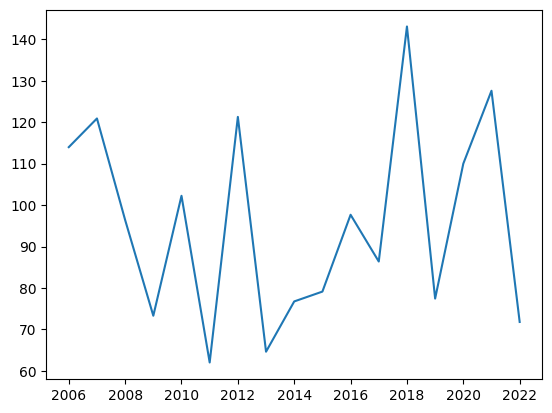

In [156]:
plt.plot( range(2006,2023), res)


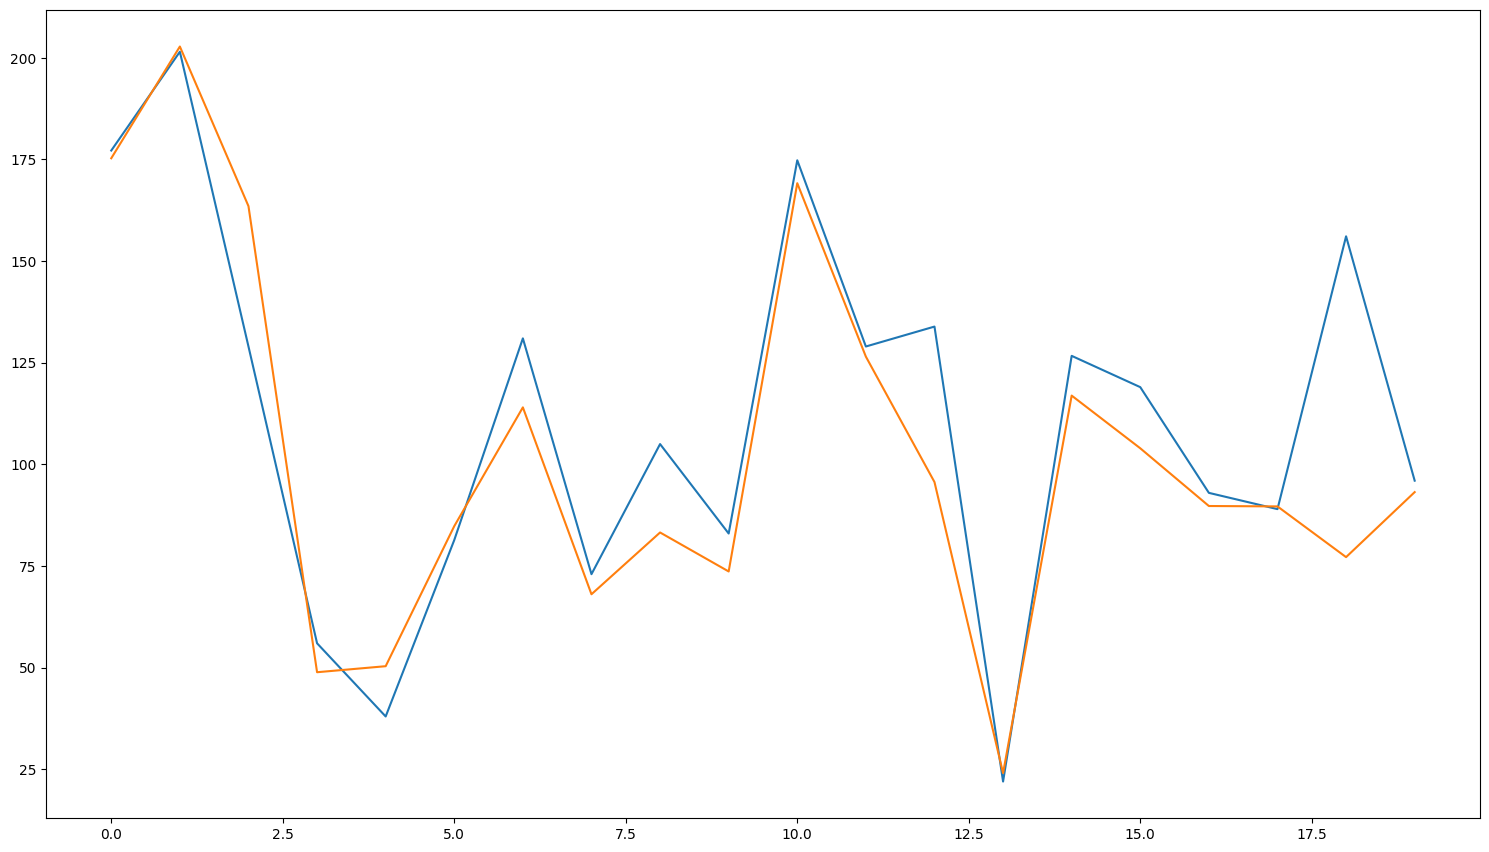

In [166]:
plt.plot(y_test[:20])
plt.plot(res_y_test[:20])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)